## Import Packages

In [1]:
import import_ipynb
import Common_Utility_CUAD as common_utility

importing Jupyter notebook from Common_Utility_CUAD.ipynb


[nltk_data] Downloading package punkt to /Users/mojojojo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/mojojojo/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,category,question,kronicle
0,Governing Law,"Highlight the parts (if any) of this contract related to ""Governing Law"" that should be reviewed by a lawyer. Details: Which state/country\s law governs the interpretation of the contract?",Governing Law
1,Non Compete,"Highlight the parts (if any) of this contract related to ""Non-Compete"" that should be reviewed by a lawyer. Details: Is there a restriction on the ability of a party to compete with the counterparty or operate in a certain geography or business or technology sector?\xa0",Non Compete Clause
2,No Solicit Of Customers,"Highlight the parts (if any) of this contract related to ""No-Solicit Of Customers"" that should be reviewed by a lawyer. Details: Is a party restricted from contracting or soliciting customers or partners of the counterparty whether during the contract or after the contract ends (or both)?",Non Solicitation
3,Termination For Convenience,"Highlight the parts (if any) of this contract related to ""Termination For Convenience"" that should be reviewed by a lawyer. Details: Can a party terminate this\xa0 contract without cause (solely by giving a notice and allowing a waiting\xa0 period to expire)?",Termination for Convenience
4,Anti Assignment,"Highlight the parts (if any) of this contract related to ""Anti-Assignment"" that should be reviewed by a lawyer. Details: Is consent or notice required of a party if the contract is assigned to a third party?",Anti Assignment
5,Post Termination Services,"Highlight the parts (if any) of this contract related to ""Post-Termination Services"" that should be reviewed by a lawyer. Details: Is a party subject to obligations after the termination or expiration of a contract including any post-termination transition payment transfer of IP wind-down last-buy or similar commitments?",Effects of Termination
6,Audit Rights,"Highlight the parts (if any) of this contract related to ""Audit Rights"" that should be reviewed by a lawyer. Details: Does a party have the right to\xa0 audit the books records or physical locations of the counterparty to ensure compliance with the contract?",Right to Audit
7,Cap On Liability,"Highlight the parts (if any) of this contract related to ""Cap On Liability"" that should be reviewed by a lawyer. Details: Does the contract include a cap on liability upon the breach of a party’s obligation? This includes time limitation for the counterparty to bring claims or maximum amount for recovery.",Limitation to Liability


PyTerrier 0.8.1 has loaded Terrier 5.6 (built by craigmacdonald on 2021-09-17 13:27)

No etc/terrier.properties, using terrier.default.properties for bootstrap configuration.


## 
## Importing and Preprocessing Standard Clauses (Master Document)

In [2]:
common_utility.print_df(common_utility.std_cls_df)

,category,sub_category,clause,tokens
0,Operative Clauses,Delivery Date and Delivery Location,Seller shall deliver the Goods on the Delivery Date specified in the Agreement as set forth in Annexure or Purchase Order All Goods shall be delivered to the address specified in the Agreement as set forth in Annexure or Purchase Order during Buyer s normal business hours or as otherwise instructed by Buyer,seller shall deliver good delivery date specify agreement set forth annexure purchase order good shall deliver address specify agreement set forth annexure purchase order buyer s normal business hour instruct buyer
1,Operative Clauses,Delivery Date and Delivery Location,Seller shall deliver the Goods within a reasonable time after the date of this Agreement subject to availability of finished Goods Any time quoted by Seller for delivery is an estimate only All Goods shall be delivered to the address specified in the Agreement as set forth in Annexure or Purchase Order,seller shall deliver good reasonable time date agreement subject availability finished good time quote seller delivery estimate good shall deliver address specify agreement set forth annexure purchase order
2,Operative Clauses,Quantity,Seller shall deliver the quantities of the Goods specified in this Agreement as set forth in Annexure or Purchase Order If Seller delivers more than or less than of the quantity of Goods specified in Annexure Buyer may reject all or any of the Goods including without limitation all or any excess Goods Any such rejected Goods shall be returned to Seller at Seller s risk and expense If Buyer does not reject the Goods and instead accepts the delivery of Goods at the increased or reduced quantity the Price for the Goods shall be adjusted on a pro rata basis,seller shall deliver quantity goods specify agreement set forth annexure purchase order seller deliver quantity goods specify annexure buyer reject goods include limitation excess good reject good shall return seller seller s risk expense buyer reject goods instead accept delivery goods increased reduce quantity price good shall adjust pro rata basis
3,Operative Clauses,Quantity,If Seller delivers more than or less than of the quantity of Goods specified in Annexure Buyer shall not be entitled to object to or reject the Goods or any portion of them by reason of the surplus or shortfall and shall pay for such Goods the price set forth in this Agreement or Purchase order adjusted on a pro rata basis Or The quantity of any instalment of Goods as recorded by Seller on dispatch from Seller s place of business is conclusive evidence of the quantity received by Buyer on delivery unless Buyer can provide conclusive evidence proving the contrary Seller shall not be liable for any non delivery of Goods even if caused by Seller s negligence unless Buyer gives written notice to Seller of the non delivery within days of the date when the Goods would in the ordinary course of events have been received,seller deliver quantity goods specify annexure buyer shall entitle object reject goods portion reason surplus shortfall shall pay good price set forth agreement purchase order adjust pro rata basis quantity instalment goods record seller dispatch seller s place business conclusive evidence quantity receive buyer delivery buyer provide conclusive evidence prove contrary seller shall liable non delivery goods cause seller s negligence buyer gives write notice seller non delivery day date goods ordinary course event receive
4,Operative Clauses,Shipping Terms,Delivery of the Goods shall be made in accordance with the terms set forth in Annexure of this Agreement or Purchase Order Seller shall be responsible for any delay damage or any loss in transit Seller shall give written notice of shipment to Buyer when the Goods are delivered to a carrier for transportation Seller shall provide Buyer all shipping documents including the commercial invoice details of Delivery Tracking System packing list air waybill bill

## 
## Readying Master document index

In [3]:
master_df = common_utility.std_cls_df.copy()
master_df = common_utility.std_cls_df.rename(columns={"sub_category": "docno"})

indexer = common_utility.pt.DFIndexer("./std_cls_idx", overwrite=True)
indexref = indexer.index(master_df["tokens"], master_df['docno'])

## 
## Running models against queries

### Test doc 1

In [5]:
results1 = common_utility.run_queries(indexref, common_utility.queries1)
common_utility.categories_to_excel('CUAD_Part1_Results/Contract 1 Categories.xlsx', 'Contract 1', results1)

In [6]:
# MISSING VALUES
missing1 = common_utility.missing_category_results(master_df, indexref, common_utility.queries1)
missing1.to_excel(f'CUAD_Part1_Results/Contract 1 Top Missing Categories.xlsx')

### 
### Test doc 2

In [7]:
results2 = common_utility.run_queries(indexref, common_utility.queries2)
common_utility.categories_to_excel('CUAD_Part1_Results/Contract 2 Categories.xlsx', 'Contract 2', results2)

In [8]:
# MISSING VALUES
missing2 = common_utility.missing_category_results(master_df, indexref, common_utility.queries2)
missing2.to_excel(f'CUAD_Part1_Results/Contract 2 Top Missing Categories.xlsx')

### 
### Test doc 3

In [9]:
results3 = common_utility.run_queries(indexref, common_utility.queries3)
common_utility.categories_to_excel('CUAD_Part1_Results/Contract 3 Categories.xlsx', 'Contract 3', results3)

In [10]:
# MISSING VALUES
missing3 = common_utility.missing_category_results(master_df, indexref, common_utility.queries3)
missing3.to_excel(f'CUAD_Part1_Results/Contract 3 Top Missing Categories.xlsx')

### 
### Test doc 4

In [11]:
results4 = common_utility.run_queries(indexref, common_utility.queries4)
common_utility.categories_to_excel('CUAD_Part1_Results/Contract 4 Categories.xlsx', 'Contract 4', results4)

In [12]:
# MISSING VALUES
missing4 = common_utility.missing_category_results(master_df, indexref, common_utility.queries4)
missing4.to_excel(f'CUAD_Part1_Results/Contract 4 Top Missing Categories.xlsx')

### 
### Test doc 5

In [13]:
results5 = common_utility.run_queries(indexref, common_utility.queries5)
common_utility.categories_to_excel('CUAD_Part1_Results/Contract 5 Categories.xlsx', 'Contract 5', results5)

In [14]:
# MISSING VALUES
missing5 = common_utility.missing_category_results(master_df, indexref, common_utility.queries5)
missing5.to_excel(f'CUAD_Part1_Results/Contract 5 Top Missing Categories.xlsx')

### 
### Test doc 6

In [15]:
results6 = common_utility.run_queries(indexref, common_utility.queries6)
common_utility.categories_to_excel('CUAD_Part1_Results/Contract 6 Categories.xlsx', 'Contract 6', results6)

In [16]:
# MISSING VALUES
missing6 = common_utility.missing_category_results(master_df, indexref, common_utility.queries6)
missing6.to_excel(f'CUAD_Part1_Results/Contract 6 Top Missing Categories.xlsx')

### 
### Test doc 7

In [17]:
results7 = common_utility.run_queries(indexref, common_utility.queries7)
common_utility.categories_to_excel('CUAD_Part1_Results/Contract 7 Categories.xlsx', 'Contract 7', results7)

In [18]:
# MISSING VALUES
missing7 = common_utility.missing_category_results(master_df, indexref, common_utility.queries7)
missing7.to_excel(f'CUAD_Part1_Results/Contract 7 Top Missing Categories.xlsx')

### 
### Test doc 8

In [19]:
results8 = common_utility.run_queries(indexref, common_utility.queries8)
common_utility.categories_to_excel('CUAD_Part1_Results/Contract 8 Categories.xlsx', 'Contract 8', results8)

In [20]:
# MISSING VALUES
missing8 = common_utility.missing_category_results(master_df, indexref, common_utility.queries8)
missing8.to_excel(f'CUAD_Part1_Results/Contract 8 Top Missing Categories.xlsx')

### 
### Test doc 9

In [21]:
results9 = common_utility.run_queries(indexref, common_utility.queries9)
common_utility.categories_to_excel('CUAD_Part1_Results/Contract 9 Categories.xlsx', 'Contract 9', results9)

In [22]:
# MISSING VALUES
missing9 = common_utility.missing_category_results(master_df, indexref, common_utility.queries9)
missing9.to_excel(f'CUAD_Part1_Results/Contract 9 Top Missing Categories.xlsx')

### 
### Test doc 10

In [23]:
results10 = common_utility.run_queries(indexref, common_utility.queries10)
common_utility.categories_to_excel('CUAD_Part1_Results/Contract 10 Categories.xlsx', 'Contract 10', results10)

In [24]:
# MISSING VALUES
missing10 = common_utility.missing_category_results(master_df, indexref, common_utility.queries10)
missing10.to_excel(f'CUAD_Part1_Results/Contract 10 Top Missing Categories.xlsx')

### 
### Test doc 11

In [25]:
results11 = common_utility.run_queries(indexref, common_utility.queries11)
common_utility.categories_to_excel('CUAD_Part1_Results/Contract 11 Categories.xlsx', 'Contract 11', results11)

In [26]:
# MISSING VALUES
missing11 = common_utility.missing_category_results(master_df, indexref, common_utility.queries11)
missing11.to_excel(f'CUAD_Part1_Results/Contract 11 Top Missing Categories.xlsx')

### 
### Test doc 12

In [27]:
results12 = common_utility.run_queries(indexref, common_utility.queries12)
common_utility.categories_to_excel('CUAD_Part1_Results/Contract 12 Categories.xlsx', 'Contract 12', results12)

In [28]:
# MISSING VALUES
missing12 = common_utility.missing_category_results(master_df, indexref, common_utility.queries12)
missing12.to_excel(f'CUAD_Part1_Results/Contract 12 Top Missing Categories.xlsx')

### 
### Test doc 13

In [29]:
results13 = common_utility.run_queries(indexref, common_utility.queries13)
common_utility.categories_to_excel('CUAD_Part1_Results/Contract 13 Categories.xlsx', 'Contract 13', results13)

In [30]:
# MISSING VALUES
missing13 = common_utility.missing_category_results(master_df, indexref, common_utility.queries13)
missing13.to_excel(f'CUAD_Part1_Results/Contract 13 Top Missing Categories.xlsx')

### 
### Test doc 14

In [31]:
results14 = common_utility.run_queries(indexref, common_utility.queries14)
common_utility.categories_to_excel('CUAD_Part1_Results/Contract 14 Categories.xlsx', 'Contract 14', results14)

In [32]:
# MISSING VALUES
missing14 = common_utility.missing_category_results(master_df, indexref, common_utility.queries14)
missing14.to_excel(f'CUAD_Part1_Results/Contract 14 Top Missing Categories.xlsx')

### 
### Test doc 15

In [33]:
results15 = common_utility.run_queries(indexref, common_utility.queries5)
common_utility.categories_to_excel('CUAD_Part1_Results/Contract 15 Categories.xlsx', 'Contract 15', results15)

In [34]:
# MISSING VALUES
missing15 = common_utility.missing_category_results(master_df, indexref, common_utility.queries15)
missing15.to_excel(f'CUAD_Part1_Results/Contract 15 Top Missing Categories.xlsx')

## 
## Evaluations

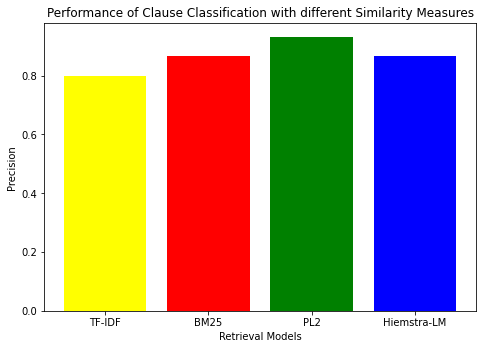

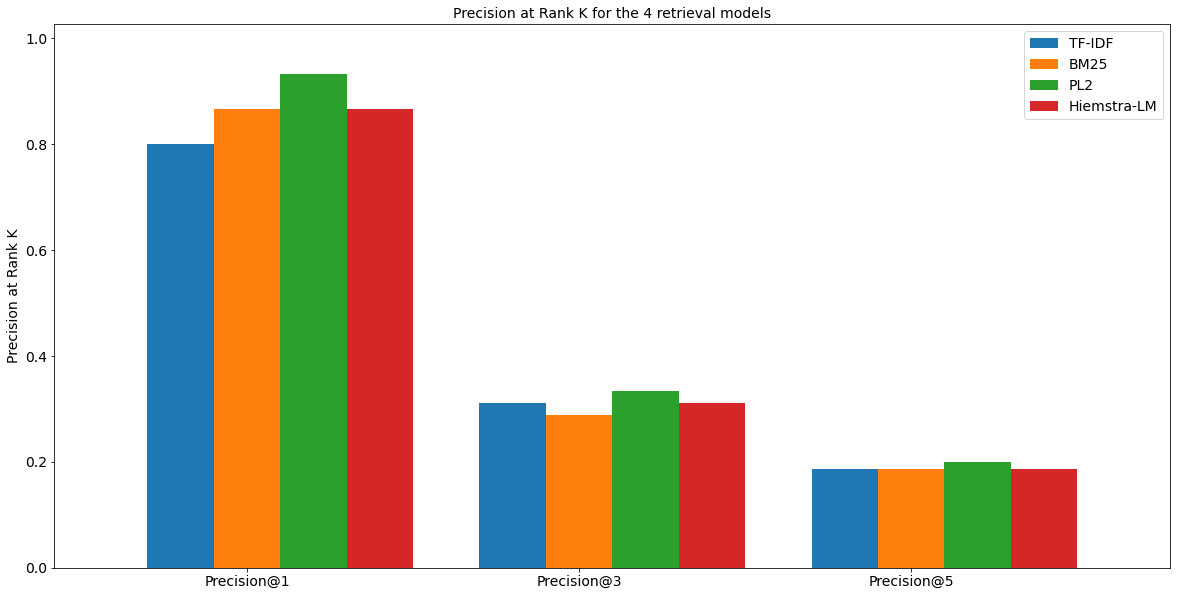

In [41]:
from sklearn.metrics import precision_score

import numpy as np
import matplotlib.pyplot as plt

xls = common_utility.pd.ExcelFile(f'Eval/Results.xlsx')

sheets = ['TFIDF', 'BM25', 'PL2', 'HLM']
precision_1 = []
preck = {}

# for i in range(1, 16):
for sheet in sheets:
    cont = common_utility.pd.read_excel(xls, sheet)
    cont = cont.applymap(lambda x: x.strip() if isinstance(x, str) else x)

    p_1 = cont['actual'] == cont['Pred@1']
    cont['Prec@1'] = [1 if x else 0 for x in p_1.tolist()]

    p_3 = (cont['actual'] == cont['Pred@1']) | (cont['actual'] == cont['Pred@2']) | (cont['actual'] == cont['Pred@3'])
    cont['Prec@3'] = [1/3 if x else 0 for x in p_3.tolist()]

    p_5 = (cont['actual'] == cont['Pred@1']) | (cont['actual'] == cont['Pred@2']) | (cont['actual'] == cont['Pred@3']) | (cont['actual'] == cont['Pred@4']) | (cont['actual'] == cont['Pred@5'])
    cont['Prec@5'] = [1/5 if x else 0 for x in p_5.tolist()]
    
    preck[sheet] = [cont['Prec@1'].mean(), cont['Prec@3'].mean(), cont['Prec@5'].mean()]

    precision_1.append(precision_score(cont['actual'], cont['Pred@1'], average='micro'))
    
    filename = f'FinalEvaluation/Results_' + sheet + '.xlsx'
    
    cont.to_excel(filename)


measures = ['TF-IDF', 'BM25', 'PL2', 'Hiemstra-LM']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(measures, precision_1, color=['yellow', 'red', 'green', 'blue'])
ax.set_ylabel('Precision')
ax.set_xlabel('Retrieval Models')
ax.set_title('Performance of Clause Classification with different Similarity Measures')
plt.show()


x = np.arange(3)  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(20, 10))
rects1 = ax.bar(x - 0.2, preck['TFIDF'], width, label='TF-IDF')
rects2 = ax.bar(x, preck['BM25'], width, label='BM25')
rects3 = ax.bar(x + 0.2, preck['PL2'], width, label='PL2')
rects4 = ax.bar(x + 0.4, preck['HLM'], width, label='Hiemstra-LM')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Precision at Rank K', fontsize=14)
ax.set_title('Precision at Rank K for the 4 retrieval models', fontsize=14)
ax.set_xticks(x) # values
ax.set_xticklabels(['Precision@1', 'Precision@3', 'Precision@5']) # labels
ax.tick_params(labelsize=14)
ax.legend(fontsize=14)
ax.margins(0.1)
plt.show()

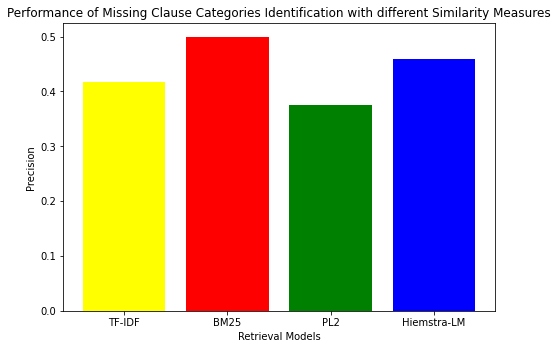

In [42]:
sheets = ['TFIDF', 'BM25', 'PL2', 'HLM']
precision_2 = []

count = len(range(1, 3))

for sheet in sheets:
    prec = 0
    for i in range(1, 11):
        xls = common_utility.pd.ExcelFile(f'Eval/Missing Results ' + str(i) + '.xlsx')
        cont = common_utility.pd.read_excel(xls, sheet)

        pred = len(cont['pred']) - cont['pred'].isnull().sum()
        total = len(cont['actual'])

        prec += pred/total

    precision_2.append(prec)
    
precision_2 = [x / count for x in precision_2]

measures = ['TF-IDF', 'BM25', 'PL2', 'Hiemstra-LM']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(measures, precision_2, color=['yellow', 'red', 'green', 'blue'])
ax.set_ylabel('Precision')
ax.set_xlabel('Retrieval Models')
ax.set_title('Performance of Missing Clause Categories Identification with different Similarity Measures')
plt.show()


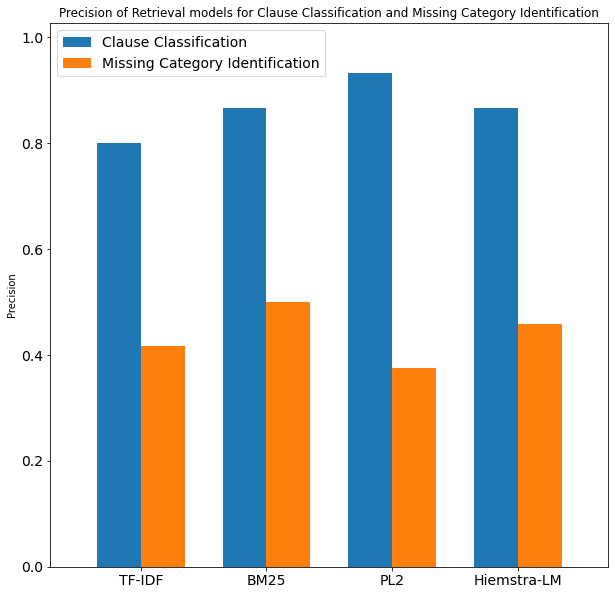

In [48]:
x = np.arange(len(measures))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 10))
rects1 = ax.bar(x - width/2, precision_1, width, label='Clause Classification')
rects2 = ax.bar(x + width/2, precision_2, width, label='Missing Category Identification')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Precision')
ax.set_title('Precision of Retrieval models for Clause Classification and Missing Category Identification')
ax.set_xticks(x, measures)
ax.tick_params(labelsize=14)
ax.legend(fontsize=14)
ax.margins(0.1)

plt.show()

## 
## Part 2

In [38]:
cuad_results1 = common_utility.filter_categories(indexref, common_utility.queries1)

In [39]:
now = common_utility.datetime.now()
start_time = now.strftime("%H:%M:%S")
print("Start Time =", start_time)
print()

predictions = common_utility.get_predictions(cuad_results1)

now = common_utility.datetime.now()
end_time = now.strftime("%H:%M:%S")
print("End Time =", end_time)

Start Time = 11:12:26

Query Start Time = 11:12:26


add example index and unique id: 100%|██████| 27/27 [00:00<00:00, 108785.98it/s]


Query End Time = 11:13:02

Query Start Time = 11:13:02


add example index and unique id: 100%|███████| 27/27 [00:00<00:00, 78479.70it/s]


Query End Time = 11:13:37

Query Start Time = 11:13:37


add example index and unique id: 100%|███████| 27/27 [00:00<00:00, 96544.08it/s]


Query End Time = 11:14:11

Query Start Time = 11:14:11


add example index and unique id: 100%|██████| 27/27 [00:00<00:00, 368880.16it/s]


Query End Time = 11:14:45

Query Start Time = 11:14:45


add example index and unique id: 100%|██████| 27/27 [00:00<00:00, 181193.93it/s]


Query End Time = 11:15:20

Query Start Time = 11:15:20


add example index and unique id: 100%|██████| 27/27 [00:00<00:00, 360656.71it/s]


Query End Time = 11:15:53

Query Start Time = 11:15:53


add example index and unique id: 100%|██████| 27/27 [00:00<00:00, 111134.65it/s]


Query End Time = 11:16:27

Query Start Time = 11:16:27


add example index and unique id: 100%|██████| 27/27 [00:00<00:00, 133074.27it/s]


Query End Time = 11:17:01

Query Start Time = 11:17:01


add example index and unique id: 100%|██████| 27/27 [00:00<00:00, 302797.35it/s]


Query End Time = 11:17:34

Query Start Time = 11:17:34


add example index and unique id: 100%|██████| 27/27 [00:00<00:00, 202950.19it/s]


Query End Time = 11:18:08

Query Start Time = 11:18:08


add example index and unique id: 100%|███████| 27/27 [00:00<00:00, 87855.86it/s]


Query End Time = 11:18:41

Query Start Time = 11:18:41


add example index and unique id: 100%|███████| 27/27 [00:00<00:00, 79638.68it/s]


Query End Time = 11:19:14

Query Start Time = 11:19:14


add example index and unique id: 100%|██████| 27/27 [00:00<00:00, 168772.29it/s]


Query End Time = 11:19:48

Query Start Time = 11:19:48


add example index and unique id: 100%|██████| 27/27 [00:00<00:00, 131681.64it/s]


Query End Time = 11:20:22

Query Start Time = 11:20:22


add example index and unique id: 100%|██████| 27/27 [00:00<00:00, 124446.38it/s]


Query End Time = 11:20:55

Query Start Time = 11:20:55


add example index and unique id: 100%|███████| 27/27 [00:00<00:00, 81296.63it/s]


Query End Time = 11:21:30

Query Start Time = 11:21:30


add example index and unique id: 100%|██████| 27/27 [00:00<00:00, 118831.28it/s]


Query End Time = 11:22:04

Query Start Time = 11:22:04


add example index and unique id: 100%|██████| 27/27 [00:00<00:00, 165564.63it/s]


Query End Time = 11:22:38

Query Start Time = 11:22:38


add example index and unique id: 100%|███████| 27/27 [00:00<00:00, 93746.86it/s]


Query End Time = 11:23:13

Query Start Time = 11:23:13


add example index and unique id: 100%|██████| 27/27 [00:00<00:00, 119964.20it/s]


Query End Time = 11:23:49

Query Start Time = 11:23:49


add example index and unique id: 100%|██████| 27/27 [00:00<00:00, 113359.57it/s]


Query End Time = 11:24:25

Query Start Time = 11:24:25


add example index and unique id: 100%|██████| 27/27 [00:00<00:00, 381300.36it/s]


Query End Time = 11:24:59

Query Start Time = 11:24:59


add example index and unique id: 100%|██████| 27/27 [00:00<00:00, 109416.63it/s]


Query End Time = 11:25:34

Query Start Time = 11:25:34


add example index and unique id: 100%|██████| 27/27 [00:00<00:00, 122826.69it/s]


Query End Time = 11:26:07

Query Start Time = 11:26:07


add example index and unique id: 100%|██████| 27/27 [00:00<00:00, 134337.14it/s]


Query End Time = 11:26:43

Query Start Time = 11:26:43


add example index and unique id: 100%|██████| 27/27 [00:00<00:00, 397355.12it/s]


Query End Time = 11:27:16

Query Start Time = 11:27:16


add example index and unique id: 100%|██████| 27/27 [00:00<00:00, 113473.15it/s]


Query End Time = 11:27:48

End Time = 11:27:48
